## Esercitazione 1 Aprile 2025

 # Implementare le function corde, secanti, Newton per il calcolo degli zeri di equazioni non lineari.

In [26]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def corde(fname, coeff_ang, x0, tolx, tolf, nmax):
    xk = []
    it = 0
    errorex = 1 + tolx
    erroref = 1 + tolf
    while it < nmax and errorex >= tolx and erroref >= tolf:
        fx0 = fname(x0)
        d = fx0/coeff_ang
        x1 = x0 - d
        erroref = abs(fname(x1))
        if x1 != 0:
            errorex = abs(d)/abs(x1)
        else:
            errorex = abs(d)
        x0 = x1
        it = it + 1
        xk.append(x1)
    if it == nmax:
        print("Raggiunto il numero massimo di iterazioni")
    return x1, it, xk

def secanti(fname, coeff_ang, x0, tolx, tolf, nmax):
    xk = []
    it = 0
    errorex = 1 + tolx
    erroref = 1 + tolf
    while it < nmax and errorex >= tolx and erroref >= tolf:
        fx0 = fname(x0)
        d = fx0/coeff_ang
        x1 = x0 - d
        fx1 = fname(x1)
        erroref = abs(fname(x1))
        if x1 != 0:
            errorex = abs(d)/abs(x1)
        else:
            errorex = abs(d)
        coeff_ang = (fx0 - fx1)/(x0 - x1)
        x0 = x1
        it = it + 1
        xk.append(x1)
    if it == nmax:
        print("Raggiunto il numero massimo di iterazioni")
    return x1, it, xk

def newton(fname, dfname, x0, tolx, tolf, nmax):
    xk = []
    it = 0
    errorex = 1 + tolx
    erroref = 1 + tolf
    while it < nmax and errorex >= tolx and erroref >= tolf:
        fx0 = fname(x0)
        coeff_ang = dfname(x0)
        d = fx0/coeff_ang
        x1 = x0 - d
        erroref = abs(fname(x1))
        if x1 != 0:
            errorex = abs(d)/abs(x1)
        else:
            errorex = abs(d)
        x0 = x1
        it = it + 1
        xk.append(x1)
    if it == nmax:
        print("Raggiunto il numero massimo di iterazioni")
    return x1, it, xk

def stima_ordine(xk, iterazioni):
      k = iterazioni - 4
      p = np.log(abs(xk[k + 2] - xk[k + 3])/abs(xk[k + 1] - xk[k + 2]))/np.log(abs(xk[k + 1] - xk[k + 2])/np.abs(xk[k] - xk[k + 1]))
     
      ordine = p
      return ordine

In [27]:
x = sym.symbols('x')
fs = sym.exp(-x) - x - 1
dfs = sym.diff(fs, x, 1)
print(dfs)

-1 - exp(-x)


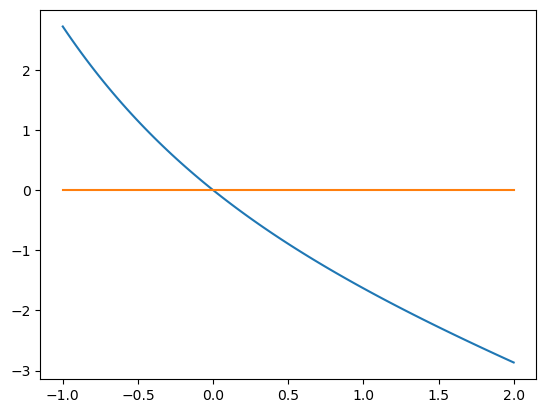

In [28]:
f_n = sym.lambdify(x, fs, np)
df_n = sym.lambdify(x, dfs, np)
a = -1.0
b = 2.0
xx = np.linspace(a, b, 100)
plt.plot(xx, f_n(xx), xx, np.zeros_like(xx))

zero corde 3.8360249906457256e-13 Numero iterazioni 11
zero secante -5.556117733109684e-17 Numero iterazioni 6
zero newton -2.3791786736070093e-14 Numero iterazioni 4
ordine corde 1.0000045394421324
ordine secante 1.6329362678112642
ordine newton 2.010656748046438


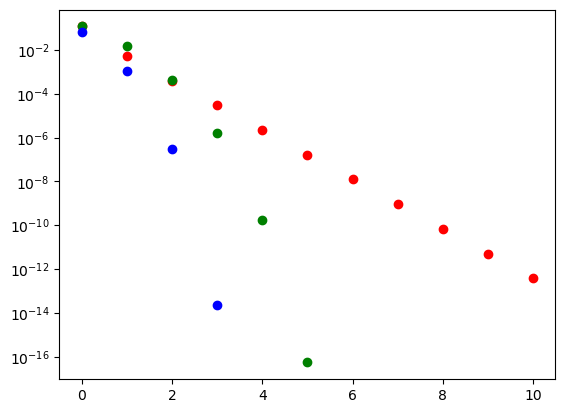

In [29]:
coeff_ang = (f_n(b) - f_n(a))/(b - a)
tolx = 1e-12
tolf = 1e-12
nmax = 100
x0 = -0.5
alpha = 0.0
x1_c, it1_c, xk1_c = corde(f_n, coeff_ang, x0, tolx, tolf, nmax)
x2_c, it2_c, xk2_c = secanti(f_n, coeff_ang, x0, tolx, tolf, nmax)
x3_c, it3_c, xk3_c = newton(f_n, df_n, x0, tolx, tolf, nmax)
print("zero corde", x1_c, "Numero iterazioni", it1_c)
print("zero secante", x2_c, "Numero iterazioni", it2_c)
print("zero newton", x3_c, "Numero iterazioni", it3_c)
print("ordine corde", stima_ordine(xk1_c, it1_c))
print("ordine secante", stima_ordine(xk2_c, it2_c))
print("ordine newton", stima_ordine(xk3_c, it3_c))
e1_c = np.abs(np.array(xk1_c) - alpha)
e2_c = np.abs(np.array(xk2_c) - alpha)
e3_c = np.abs(np.array(xk3_c) - alpha)
plt.semilogy(np.arange(it1_c), e1_c, 'ro')
plt.semilogy(np.arange(it2_c), e2_c, 'go')
plt.semilogy(np.arange(it3_c), e3_c, 'bo')

## Esercizio 1 

 Confrontare tutti i metodi implementati (bisezione, falsa posizione, corde, secanti, Newton) nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.

Calcolare l'ordine di ciascun metodo.


Calcolare gli zeri della funzione $f(x)=x^4-9x^2+4x+12$ definita sul'intervallo [-4,4] usando i metodi di Newton, corde e secandi, scegliendo opportunamente l'iterato iniziale per ogni metodo.

# Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.

In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni effettuate, nit.


Implementare in altre due function `NewtonRaphson_Corde.py` e `NewtonRaphson_Sham.py` le varianti Corde e la variante di  Shamanskii


## Esercizio 1

Risolvere i seguenti cinque sistemi non lineari con tutti e tre i metodi e confrontare in scala logaritmica l'errore relativo tra due iterati successivi

    1) 
    2x0-cos(x1)=0

    sin(x0)+2x1=0

    2) 
    x0^2+x1^2-4=0

    x0^2-x1*2-1=0

    3) 
    x0^2+x1^2-2=0

    exp(x0-1)+x1^3-3
    
    4) 
    4x0^2+x_1^2^-4=0

    x0+x1-sin(x0-x1)=0

    5)

    x0+x1-3=0

    x0^2+x1^2-9=0
    
    
Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym
from sympy import symbols, Matrix, lambdify


# Definizione variabili simboliche
x_sym, y_sym = symbols('x_sym y_sym')

# Definizione funzioni simboliche usando variabili simboliche 
       
f1_sym = lambda x_sym,y_sym: x_sym+y_sym-3   #[-1,1]
f2_sym = lambda x_sym,y_sym: x_sym**2+y_sym**2-9



def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)


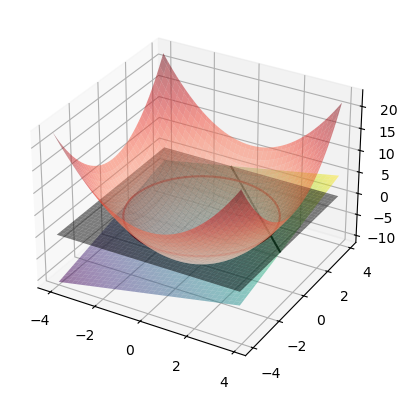

In [31]:

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
 
plt.show()


In [32]:
def newton_raphson(initial_guess, F_numerical, J_numerical, tolx, tolf, max_it):
    X = np.array(initial_guess)
    it = 0
    erroreF = 1 + tolf
    erroreX = 1 + tolx
    errore = []
    while it < max_it and erroreF >= tolf and erroreX >= tolx:
        jx = J_numerical(X[0], X[1])
        if np.linalg.det(jx) == 0:
            print("La matrice jacobiana calcolata nell'iterato precedente non ha rango massimo")
            return None, None, None
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze()
        s = np.linalg.solve(jx, -fx)
        Xnew = X + s
        normaXnew = np.linalg.norm(Xnew, 1)
        if normaXnew != 0:
            erroreX = np.linalg.norm(s, 1)/normaXnew
        else:
            erroreX = np.linalg.norm(s, 1)
        errore.append(erroreX)
        fXnew = F_numerical(Xnew[0], Xnew[1])
        erroreF = np.linalg.norm(fXnew.squeeze(), 1)
        X = Xnew
        it = it + 1
    return X, it, errore

def newton_raphson_corde(initial_guess, F_numerical, J_numerical, tolx, tolf, max_it):
    X = np.array(initial_guess)
    it = 0
    erroreF = 1 + tolf
    erroreX = 1 + tolx
    errore = []
    jx = J_numerical(X[0], X[1])
    while it < max_it and erroreF >= tolf and erroreX >= tolx:
        if np.linalg.det(jx) == 0:
            print("La matrice jacobiana calcolata nell'iterato precedente non ha rango massimo")
            return None, None, None
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze()
        s = np.linalg.solve(jx, -fx)
        Xnew = X + s
        normaXnew = np.linalg.norm(Xnew, 1)
        if normaXnew != 0:
            erroreX = np.linalg.norm(s, 1)/normaXnew
        else:
            erroreX = np.linalg.norm(s, 1)
        errore.append(erroreX)
        fXnew = F_numerical(Xnew[0], Xnew[1])
        erroreF = np.linalg.norm(fXnew.squeeze(), 1)
        X = Xnew
        it = it + 1
    return X, it, errore

def newton_raphson_shamanski(initial_guess, F_numerical, J_numerical, tolx, tolf, max_it):
    X = np.array(initial_guess)
    it = 0
    erroreF = 1 + tolf
    erroreX = 1 + tolx
    errore = []
    while it < max_it and erroreF >= tolf and erroreX >= tolx:
        if it%5 == 0:
            jx = J_numerical(X[0], X[1])
            if np.linalg.det(jx) == 0:
                print("La matrice jacobiana calcolata nell'iterato precedente non ha rango massimo")
                return None, None, None
        fx = F_numerical(X[0], X[1])
        fx = fx.squeeze()
        s = np.linalg.solve(jx, -fx)
        Xnew = X + s
        normaXnew = np.linalg.norm(Xnew, 1)
        if normaXnew != 0:
            erroreX = np.linalg.norm(s, 1)/normaXnew
        else:
            erroreX = np.linalg.norm(s, 1)
        errore.append(erroreX)
        fXnew = F_numerical(Xnew[0], Xnew[1])
        erroreF = np.linalg.norm(fXnew.squeeze(), 1)
        X = Xnew
        it = it + 1
    return X, it, errore

coordinate della soluzione del sistema -3.795995477590896e-15 3.000000000000004 Numero di iterazioni 5
coordinate della soluzione del sistema -8.295828006602583e-13 3.0000000000008296 Numero di iterazioni 30
coordinate della soluzione del sistema -1.0850591502140158e-14 3.0000000000000107 Numero di iterazioni 10


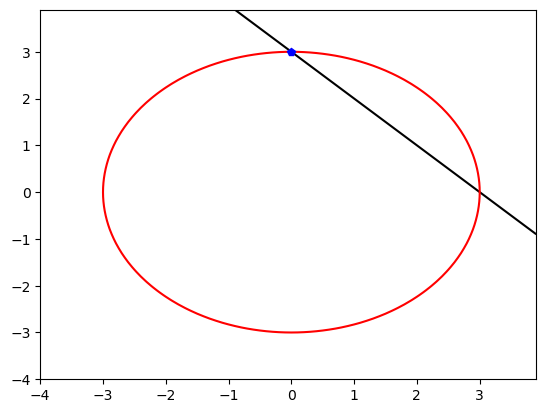

In [33]:
initial_guess = [-2.0, 3.0]
tolX = 1e-12
tolF = 1e-12
max_it = 100
XN, itN, erroreN = newton_raphson(initial_guess, F_numerical, J_numerical, tolX, tolF, max_it)
XNc, itNc, erroreNc = newton_raphson_corde(initial_guess, F_numerical, J_numerical, tolX, tolF, max_it)
XNs, itNs, erroreNs = newton_raphson_shamanski(initial_guess, F_numerical, J_numerical, tolX, tolF, max_it)
print("coordinate della soluzione del sistema", XN[0], XN[1], "Numero di iterazioni", itN)
print("coordinate della soluzione del sistema", XNc[0], XNc[1], "Numero di iterazioni", itNc)
print("coordinate della soluzione del sistema", XNs[0], XNs[1], "Numero di iterazioni", itNs)
plt.contour(X, Y, superfici[0,:,:],  levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
plt.plot(XN[0], XN[1], 'bp')
plt.show()

# Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti tre funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x - 2)^4 + (x - 2)^2 y^2+(y+1)^2$$
   $$x^4+(x+y)^2y^2+(exp(x)-1)^2$$
   $$100(y-x^2)^2+(1-x_sym)^2$$

In [43]:
F_sym = 100*(y_sym - x_sym**2)**2 + (1 - x_sym)**2
grad_F = sym.derive_by_array(F_sym, (x_sym, y_sym))
print("Gradiente", grad_F)

H = sym.hessian(F_sym, (x_sym, y_sym))
print("Hessiana", H)

grad_F_num = sym.lambdify((x_sym, y_sym), grad_F, 'numpy')
H_num = sym.lambdify((x_sym, y_sym), H, 'numpy')
F_num = sym.lambdify((x_sym, y_sym), F_sym, 'numpy')

Gradiente [-400*x_sym*(-x_sym**2 + y_sym) + 2*x_sym - 2, -200*x_sym**2 + 200*y_sym]
Hessiana Matrix([[1200*x_sym**2 - 400*y_sym + 2, -400*x_sym], [-400*x_sym, 200]])


In [49]:
def newton_raphson_minimo(initial_guess, grad_F_num, H_num, tolX, tolF, max_iterations):
    X = np.array(initial_guess, dtype=float)
    it = 0
    erroreF = 1 + tolF
    erroreX = 1 + tolX
    errore = []
    while it < max_iterations and erroreF >= tolF and erroreX >= tolX:
        Hx = H_num(X[0], X[1])
        if np.linalg.det(Hx) == 0:
            print("Matrice Hessiana singolare")
            return None, None, None
        gfx = grad_F_num(X[0], X[1])
        gfx = gfx.squeeze()
        s = np.linalg.solve(Hx, -gfx)
        Xnew = X + s
        gfxnew = grad_F_num(Xnew[0], Xnew[1])
        erroreF = np.linalg.norm(Xnew, 1)
        X = Xnew
        it = it + 1
    return X, it, errore

In [50]:
initial_guess = [0.0, 2.0]
tolX = 1e-10
tolF = 1e-10
max_iterations = 100
X_min, it, errore = newton_raphson_minimo(initial_guess, grad_F_num, H_num, tolX, tolF, max_iterations)
print("X_min ", X_min, " iterazioni -->", it)

X_min  [1. 1.]  iterazioni --> 100


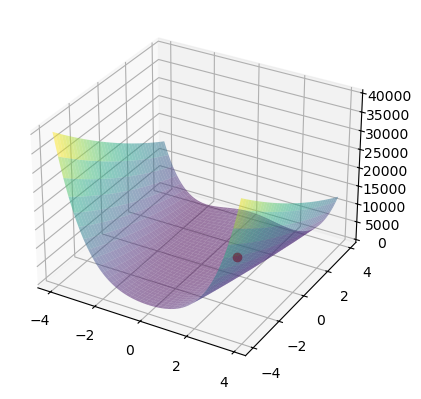

In [54]:
x = np.arange(-4, 4.01, 0.1)
y = np.arange(-4, 4.01, 0.1)
Z = F_num(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
plt.plot(X_min[0], X_min[1], 'ro')